In [3]:
%reload_ext autoreload
%autoreload 2<br>
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
path = Path('data')

In [6]:
path.ls()


[PosixPath('data/02_04_1_025.png'),
 PosixPath('data/02_04_2_009.png'),
 PosixPath('data/02_04_1_030.png'),
 PosixPath('data/02_04_2_024.png'),
 PosixPath('data/03_05_2_003.png'),
 PosixPath('data/02_07_2_017.png'),
 PosixPath('data/03_05_2_037.png'),
 PosixPath('data/01_01_2_013.png'),
 PosixPath('data/04_06_1_009.png'),
 PosixPath('data/04_06_2_008.png'),
 PosixPath('data/01_02_2_023.png'),
 PosixPath('data/01_01_2_003.png'),
 PosixPath('data/02_07_2_018.png'),
 PosixPath('data/01_03_2_021.png'),
 PosixPath('data/01_02_1_003.png'),
 PosixPath('data/03_05_2_015.png'),
 PosixPath('data/02_04_1_020.png'),
 PosixPath('data/03_05_2_018.png'),
 PosixPath('data/01_01_2_020.png'),
 PosixPath('data/02_04_1_028.png'),
 PosixPath('data/01_01_2_002.png'),
 PosixPath('data/04_06_1_025.png'),
 PosixPath('data/03_05_1_012.png'),
 PosixPath('data/03_05_1_018.png'),
 PosixPath('data/01_01_2_018.png'),
 PosixPath('data/01_01_2_042.png'),
 PosixPath('data/01_03_1_018.png'),
 PosixPath('data/01_03_1_031

In [7]:
df = pd.read_csv(path/'decor.csv')
df.head()

,country_label,country,decor_label,decor,type_label,type,file
0,1,Russia,1,Gzhel,1,pattern,01_01_1_001.png
1,1,Russia,1,Gzhel,1,pattern,01_01_1_002.png
2,1,Russia,1,Gzhel,1,pattern,01_01_1_003.png
3,1,Russia,1,Gzhel,1,pattern,01_01_1_004.png
4,1,Russia,1,Gzhel,1,pattern,01_01_1_005.png


In [8]:


tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [15]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'decor.csv', cols= 'file')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [16]:
 data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

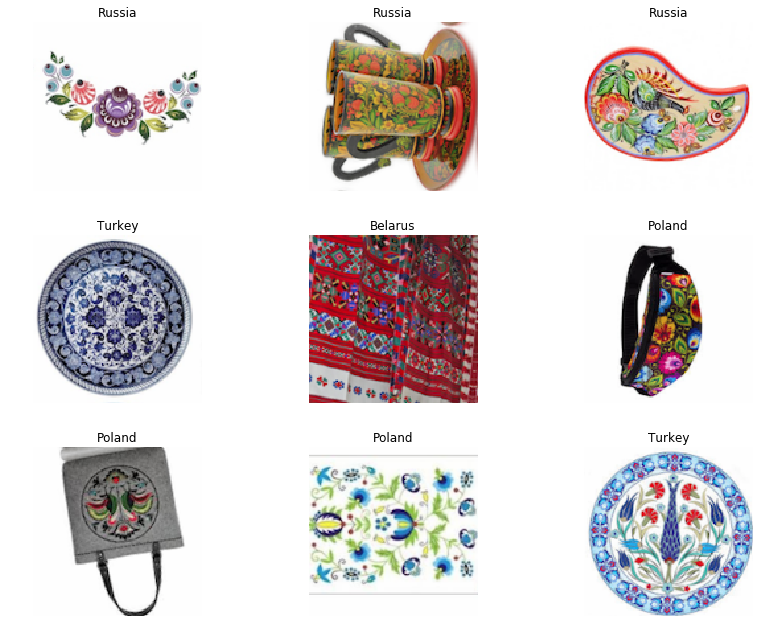

In [18]:
data.show_batch(rows=3, figsize=(12,9))

In [19]:
arch = models.resnet50

In [20]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
